# Hull White Term Structure Simulations

The Hull-White Short Rate Model is defined as:
$$ dr_t = (\theta(t) - a r_t)dt + \sigma dW_t $$

In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import models.IRCurve as irc
% matplotlib inline

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

def alpha(forward, sigma, a, t):
    return forward + 0.5* np.power(sigma/a*(1.0 - np.exp(-a*t)), 2)

In [13]:
ir = irc.getIRCurves(currency='GBP', irType='Libor')
ddate = ir._dates[0]
refDate = ql.Date(ddate.day, ddate.month, ddate.year)
sigma = 0.00065
a = 0.008
timestep = 360
length = 1 # in years
levels = np.asarray(ir._levels)[0]
# for i in range(len(ir._dates)):
fw = ir.curveToArray(levels, ir[ddate])
forward_rate = ir.curveimpl( refDate,fw)
ql.Settings.instance().evaluationDate = refDate
spot_curve = ir[ddate]
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

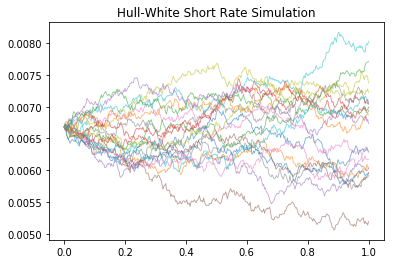

In [14]:
num_paths = 20
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

In [15]:
print(time.shape)
time

(361,)


array([ 0.        ,  0.00277778,  0.00555556,  0.00833333,  0.01111111,
        0.01388889,  0.01666667,  0.01944444,  0.02222222,  0.025     ,
        0.02777778,  0.03055556,  0.03333333,  0.03611111,  0.03888889,
        0.04166667,  0.04444444,  0.04722222,  0.05      ,  0.05277778,
        0.05555556,  0.05833333,  0.06111111,  0.06388889,  0.06666667,
        0.06944444,  0.07222222,  0.075     ,  0.07777778,  0.08055556,
        0.08333333,  0.08611111,  0.08888889,  0.09166667,  0.09444444,
        0.09722222,  0.1       ,  0.10277778,  0.10555556,  0.10833333,
        0.11111111,  0.11388889,  0.11666667,  0.11944444,  0.12222222,
        0.125     ,  0.12777778,  0.13055556,  0.13333333,  0.13611111,
        0.13888889,  0.14166667,  0.14444444,  0.14722222,  0.15      ,
        0.15277778,  0.15555556,  0.15833333,  0.16111111,  0.16388889,
        0.16666667,  0.16944444,  0.17222222,  0.175     ,  0.17777778,
        0.18055556,  0.18333333,  0.18611111,  0.18888889,  0.19

The short rate $r(t)$ is given a distribution with the properties:

$$ E\{r(t) | F_s\} = r(s)e^{-a(t-s)}  + \alpha(t) - \alpha(s)e^{-a(t-s)} $$
   $$ Var\{ r(t) | F_s \} = \frac{\sigma^2}{2a} [1 - e^{-2a(t-s)}] $$
   where 
   $$ \alpha(t) = f^M(0, t) + \frac{\sigma^2} {2a^2}(1-e^{-at})^2$$

In [16]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)

The mean and variance compared between the simulation (red dotted line) and theory (blue line).

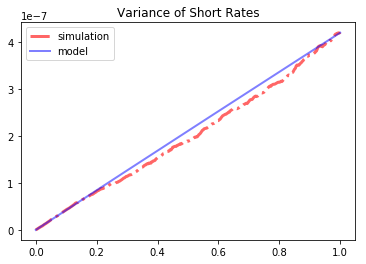

In [17]:
vol = [np.var(paths[:, i]) for i in range(timestep+1)]
plt.plot(time, vol, "r-.", lw=3, alpha=0.6,label="simulation")
plt.plot(time,sigma*sigma/(2*a)*(1.0-np.exp(-2.0*a*np.array(time))), "b-", lw=2, alpha=0.5,label="model")
plt.title("Variance of Short Rates")
plt.legend()

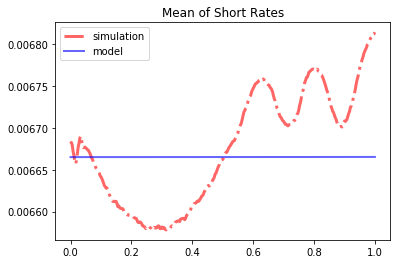

In [23]:
avg = [np.mean(paths[:, i]) for i in range(timestep+1)]
plt.plot(time, avg, "r-.", lw=3, alpha=0.6,label="simulation")
plt.plot(time,alpha(fw[15], sigma, a, time), "b-", lw=2, alpha=0.6,label="model")
plt.title("Mean of Short Rates")
plt.legend()